In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('data/kumaa25_class.txt')

In [24]:
df

,programme,level,age,handedness,mother,father,height,gender,distance,study,vision,cell,d2,d4
0,other,1,19.0,R,R,R,75.0,2.0,51.9,7.9,N,80.0,8.3,8.4
1,other,1,20.0,R,R,R,71.0,1.0,12.0,7.0,N,300.0,5.5,5.5
2,other,1,20.0,R,R,R,67.0,1.0,23.0,5.5,Y,240.0,7.0,8.0
3,ls,2,19.0,R,R,R,67.0,1.0,NaN,NaN,Y,NaN,NaN,NaN
4,ls,2,19.0,R,R,NaN,62.0,1.0,37.0,2.5,N,150.0,7.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,ls,5,22.0,R,R,R,69.0,2.0,10.0,3.0,Y,3.0,5.4,5.6
396,bio,5,22.0,R,R,R,67.0,1.0,0.4,5.0,N,240.0,7.6,7.2
397,ls,6,23.0,R,R,R,62.0,1.0,1.0,6.0,N,180.0,5.7,6.0
398,other,6,22.0,R,R,R,65.0,1.0,57.0,3.0,N,240.0,5.7,6.1


In [25]:
study_df = df['study']
study_df


0      7.9
1      7.0
2      5.5
3      NaN
4      2.5
      ... 
395    3.0
396    5.0
397    6.0
398    3.0
399    4.0
Name: study, Length: 400, dtype: float64

In [26]:
study_df.dropna(inplace=True)

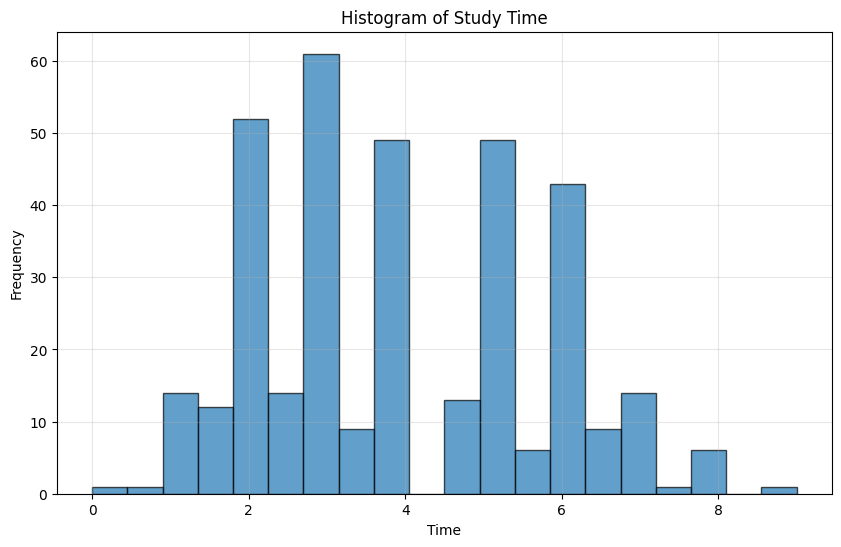

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(study_df, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Study Time')
plt.grid(True, alpha=0.3)
plt.show()

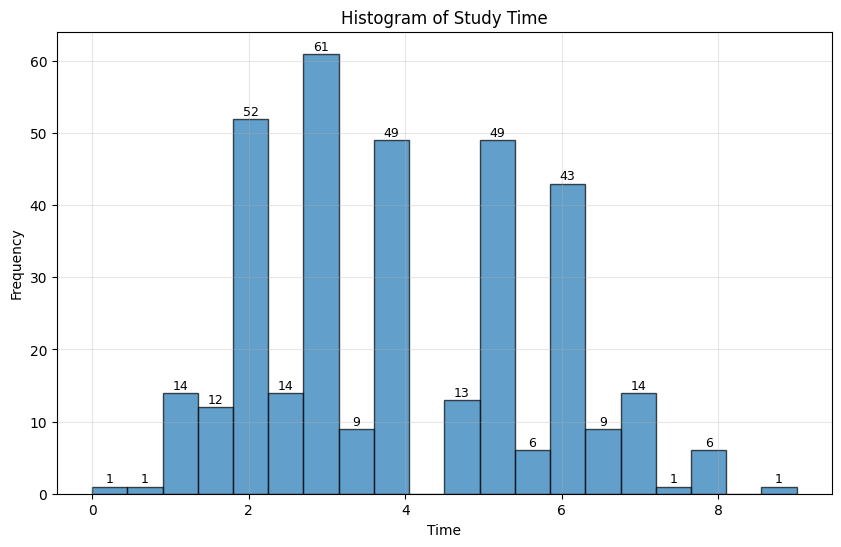

In [28]:
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(study_df, bins=20, edgecolor='black', alpha=0.7)

# Add height labels on top of bars
for i in range(len(n)):
    if n[i] > 0:  # Only show label if bar has height
        plt.text(bins[i] + (bins[i+1] - bins[i])/2, n[i] + 0.1, 
                str(int(n[i])), ha='center', va='bottom', fontsize=9)

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Histogram of Study Time')
plt.grid(True, alpha=0.3)
plt.show()

In [33]:
males_df = df[df['gender'] == 2]
females_df = df[df['gender'] == 1]

In [34]:
study_males_df = males_df['study']
study_females_df = females_df['study']

In [35]:
study_males_df

0      7.9
9      5.0
11     3.5
14     1.0
15     3.0
      ... 
382    3.0
383    4.0
389    7.0
393    6.0
395    3.0
Name: study, Length: 133, dtype: float64

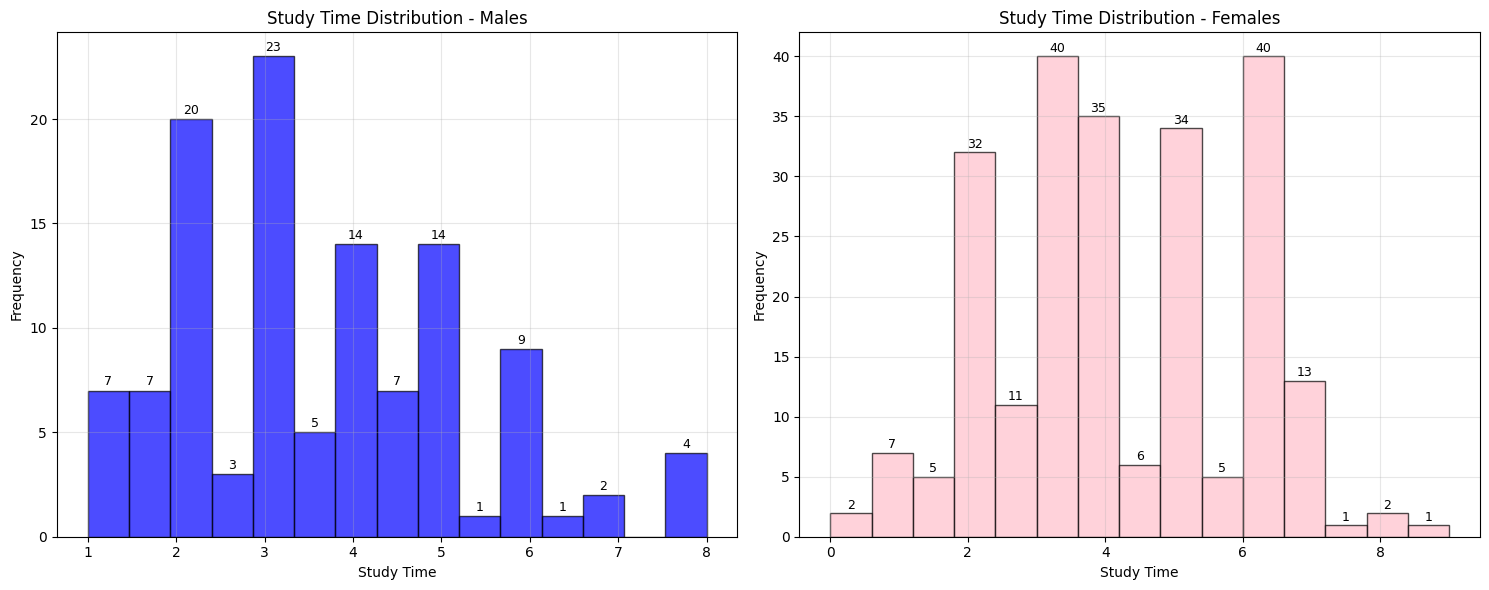

In [36]:
study_males_clean = study_males_df.dropna()
study_females_clean = study_females_df.dropna()


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))


n_males, bins_males, patches_males = ax1.hist(study_males_clean, bins=15, edgecolor='black', alpha=0.7, color='blue')
ax1.set_xlabel('Study Time')
ax1.set_ylabel('Frequency')
ax1.set_title('Study Time Distribution - Males')
ax1.grid(True, alpha=0.3)


for i in range(len(n_males)):
    if n_males[i] > 0:
        ax1.text(bins_males[i] + (bins_males[i+1] - bins_males[i])/2, n_males[i] + 0.1, 
                str(int(n_males[i])), ha='center', va='bottom', fontsize=9)

# Female histogram
n_females, bins_females, patches_females = ax2.hist(study_females_clean, bins=15, edgecolor='black', alpha=0.7, color='pink')
ax2.set_xlabel('Study Time')
ax2.set_ylabel('Frequency')
ax2.set_title('Study Time Distribution - Females')
ax2.grid(True, alpha=0.3)

# Add height labels for females
for i in range(len(n_females)):
    if n_females[i] > 0:
        ax2.text(bins_females[i] + (bins_females[i+1] - bins_females[i])/2, n_females[i] + 0.1, 
                str(int(n_females[i])), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

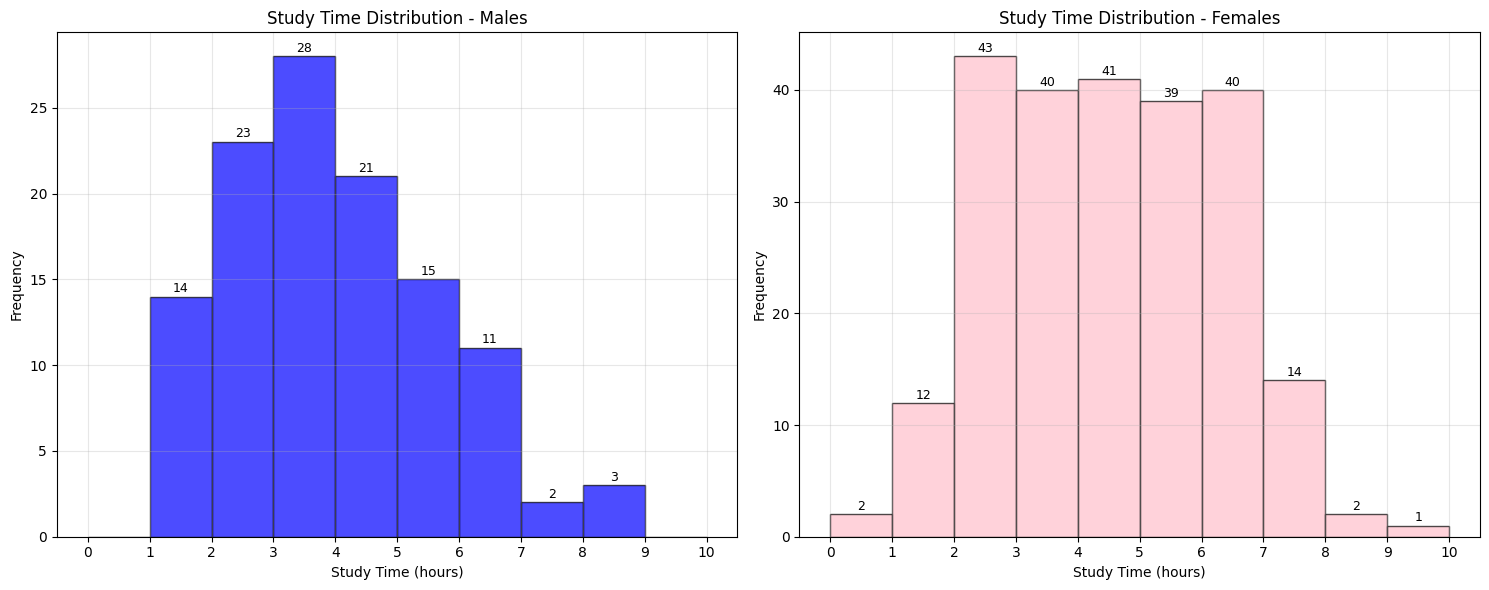

Heights of bars for males (first 8 values):
0, 14, 23, 28, 21, 15, 11, 2

Heights of bars for females:
2, 12, 43, 40, 41, 39, 40, 14, 2, 1

Total females: 234
Females studying at least 3 hours: 177
Percentage of females studying at least 3 hours: 75.6%


In [37]:
# Clean the data by removing NaN values
study_males_clean = study_males_df.dropna()
study_females_clean = study_females_df.dropna()

# Define the specific bins as requested: 0-1, 1-2, 2-3, 3-4, 4-5, 5-6, 6-7, 7-8, 8-9, 9-10
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create side-by-side histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Male histogram
n_males, bins_males, patches_males = ax1.hist(study_males_clean, bins=bins, edgecolor='black', alpha=0.7, color='blue')
ax1.set_xlabel('Study Time (hours)')
ax1.set_ylabel('Frequency')
ax1.set_title('Study Time Distribution - Males')
ax1.set_xticks(bins)  # Set tick marks at cutpoints
ax1.grid(True, alpha=0.3)

# Add height labels for males
for i in range(len(n_males)):
    if n_males[i] > 0:
        ax1.text(bins[i] + 0.5, n_males[i] + 0.1, 
                str(int(n_males[i])), ha='center', va='bottom', fontsize=9)

# Female histogram
n_females, bins_females, patches_females = ax2.hist(study_females_clean, bins=bins, edgecolor='black', alpha=0.7, color='pink')
ax2.set_xlabel('Study Time (hours)')
ax2.set_ylabel('Frequency')
ax2.set_title('Study Time Distribution - Females')
ax2.set_xticks(bins)  # Set tick marks at cutpoints
ax2.grid(True, alpha=0.3)

# Add height labels for females
for i in range(len(n_females)):
    if n_females[i] > 0:
        ax2.text(bins[i] + 0.5, n_females[i] + 0.1, 
                str(int(n_females[i])), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print the heights for analysis
print("Heights of bars for males (first 8 values):")
print(", ".join([str(int(x)) for x in n_males[:8]]))

print("\nHeights of bars for females:")
print(", ".join([str(int(x)) for x in n_females]))

# Calculate percentage of females who study at least 3 hours
females_3_plus = sum(n_females[3:])  # Sum from 3-4 hours onwards
total_females = sum(n_females)
percentage_females_3_plus = (females_3_plus / total_females) * 100

print(f"\nTotal females: {int(total_females)}")
print(f"Females studying at least 3 hours: {int(females_3_plus)}")
print(f"Percentage of females studying at least 3 hours: {percentage_females_3_plus:.1f}%")

In [38]:
# Convert cell phone time from minutes to hours
df['cell_hours'] = df['cell'] / 60

# Verify the mean
cell_hours_mean = df['cell_hours'].mean()
print(f"Mean of cell_hours: {cell_hours_mean:.5f}")
print(f"Expected mean: 3.26152")
print(f"Match: {abs(cell_hours_mean - 3.26152) < 0.00001}")

# Remove NaN values for the stem-and-leaf plot
cell_hours_clean = df['cell_hours'].dropna()

# Sort the data
cell_hours_sorted = sorted(cell_hours_clean)

print(f"\nTotal number of observations: {len(cell_hours_sorted)}")
print(f"Range: {min(cell_hours_sorted):.2f} to {max(cell_hours_sorted):.2f} hours")

# Create stem-and-leaf plot with intervals of length 1
print("\nStem-and-Leaf Plot (Cell Phone Usage in Hours)")
print("Stem | Leaf")
print("-----|-----")

# Group data by stem (integer part)
stems = {}
for value in cell_hours_sorted:
    stem = int(value)  # Integer part
    leaf = int((value - stem) * 10)  # First decimal digit
    if stem not in stems:
        stems[stem] = []
    stems[stem].append(leaf)

# Print the stem-and-leaf plot
for stem in sorted(stems.keys()):
    leaves = sorted(stems[stem])
    leaves_str = ' '.join([str(leaf) for leaf in leaves])
    print(f"{stem:4d} | {leaves_str}")

# Answer the questions
print("\n" + "="*50)
print("ANSWERS:")

# (a) How many people spend at least 2 hours per day using their cell phone?
at_least_2_hours = sum(1 for x in cell_hours_sorted if x >= 2)
print(f"(a) People spending at least 2 hours per day: {at_least_2_hours}")

# (b) How many people spend at least 1 hour, but less than 2 hours using their cell phone?
between_1_and_2_hours = sum(1 for x in cell_hours_sorted if 1 <= x < 2)
print(f"(b) People spending at least 1 hour but less than 2 hours: {between_1_and_2_hours}")

print("\nDetailed breakdown:")
print(f"Less than 1 hour: {sum(1 for x in cell_hours_sorted if x < 1)}")
print(f"1 to <2 hours: {between_1_and_2_hours}")
print(f"2+ hours: {at_least_2_hours}")
print(f"Total: {len(cell_hours_sorted)}")

Mean of cell_hours: 3.26152
Expected mean: 3.26152
Match: True

Total number of observations: 363
Range: 0.00 to 12.00 hours

Stem-and-Leaf Plot (Cell Phone Usage in Hours)
Stem | Leaf
-----|-----
   0 | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 5 5 6 7
   1 | 0 0 0 0 0 0 0 0 0 0 2 2 2 3 5 5 5 5 5 5 5 5 5 6 6
   2 | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 6
   3 | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 7 7 8
   4 | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 5 5 5
   5 | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 5 5 8
   6 | 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 6
   7 | 0 0 0 0 0 0 0
   8 | 0 0 0 0 0 3
  10 | 0 0 0 0
  11 | 0 6
  